In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch
import taranis.core.dataset.split as split

from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F


dataset = datasets.MNIST(
    '../data', 
    train=True, 
    download=True
)
print(len(dataset))


image, label = dataset[2]
print(image.size, label)  # A Black and white image is a 2D matrix (28x28)
image


NOTE: Redirects are currently not supported in Windows or MacOs.


60000
(28, 28) 4


(28, 28)


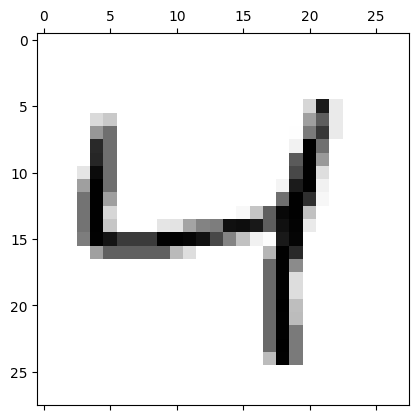

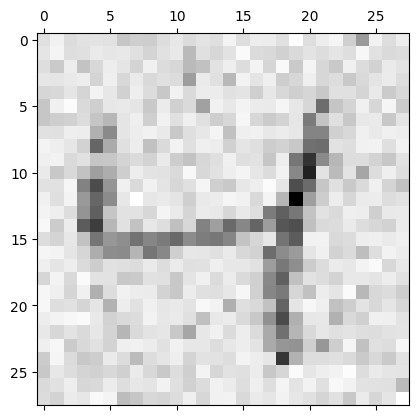

In [49]:
m, n = 28 * 28, 28 * 28 * 2


def Identity(in_features, out_features):
    """The idea is to help training by forwarding the X by default"""
    layer = nn.Linear(in_features, out_features)
    for i in range(min(in_features, out_features)):
        layer.weight.data[i, i] = 1
    return layer

linear = nn.Sequential(
    nn.Flatten(),             
    Identity(m, n),
    nn.ReLU(),
    Identity(n, m),
)

batch = transforms.ToTensor()(image)

new = linear(batch).detach().view(28, 28).numpy()

print(new.shape)
plt.matshow(batch.squeeze(0), interpolation=None, cmap='Greys')
plt.matshow(new, interpolation=None, cmap='Greys')
plt.show()

In [61]:
def train(model, epoch=100):
    optimizer = optim.Adadelta(model.parameters(), lr=1)

    for i in range(epoch):
        optimizer.zero_grad()
        pred = model(input)
        loss = F.mse_loss(pred, output)
        loss.backward()
        optimizer.step()

        if i % (epoch / 10) == 0:
            print(loss.item())

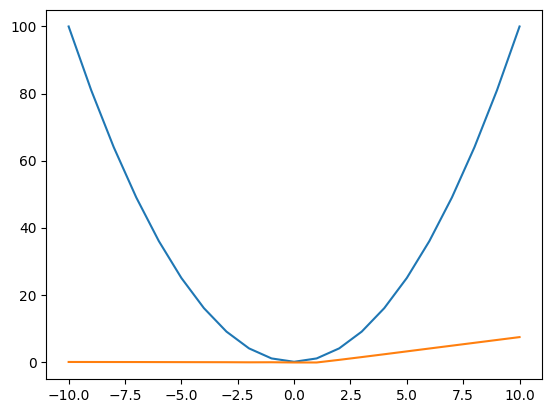

In [62]:
m, n = 1, 128

model = nn.Sequential(
    nn.Flatten(),             
    Identity(m, n),
    nn.ReLU(),
    Identity(n, m),
)

x = np.asarray(list(range(-10, 11)))
y = x ** 2

input = torch.tensor(x, dtype=torch.float).unsqueeze(1)
output = torch.tensor(y, dtype=torch.float).unsqueeze(1)
pred = model(input).detach().numpy()

plt.plot(x, y)
plt.plot(x, pred)

2261.325439453125
50.68387222290039
28.288190841674805
21.77826499938965
17.47411346435547
14.667072296142578
12.959932327270508
11.297623634338379
9.874168395996094
8.645029067993164


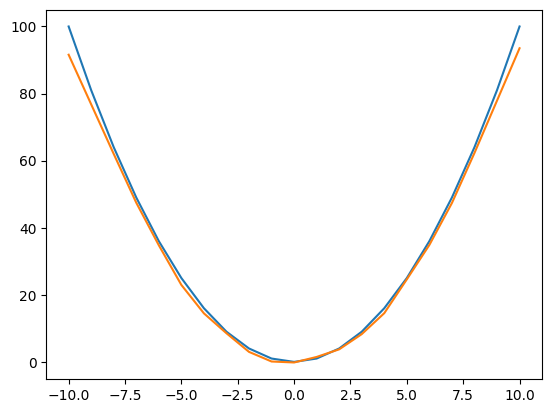

In [68]:
model = nn.Sequential(
    nn.Flatten(),             
    Identity(1, 128),
    nn.ReLU(),
    Identity(128, 1),
)

train(model, 2000)

pred = model(input).detach().numpy()
plt.plot(x, y)
plt.plot(x, pred)